# MALA

In [8]:
%load_ext autoreload
%autoreload 2
import site
import sys
import time
site.addsitedir('..')
from jax.config import config

config.update("jax_enable_x64", True)

import numpy as np
import jax.numpy as jnp
from  matplotlib import pyplot as plt
import jax
from src.utils import l2sq
from src.algorithm import*

plt.rcParams["figure.figsize"]=8,8

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
rng = np.random.default_rng()

[[ 3.36686003 -2.21809476]
 [-2.21809476  3.74281246]]


(-12.0, 12.0)

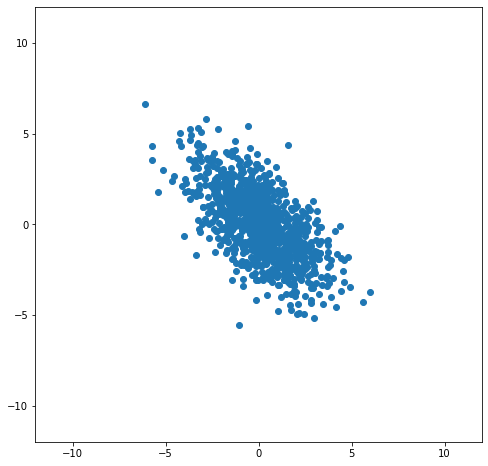

In [202]:
k = 2
M = jnp.zeros(k)
#c = jnp.array([[1,0],[0,10]])
#c_inv = jnp.array([[1, 0], [0,1/10]])

V = jnp.array(np.random.randn(k, k))
Q, _ = jnp.linalg.qr(V)
d = jnp.diag(np.random.rand(k)*10)
D= d.at[d < 0].set(0)
C = Q.transpose() @ D @ Q
C_inv = Q.transpose() @ jnp.diag(1/jnp.diag(D)) @ Q
print(C)

S = rng.multivariate_normal(M, C, 1000)
plt.scatter(S[:,0], S[:,1])
plt.xlim(-12,12)
plt.ylim(-12,12)

In [203]:
logPi = lambda x : -1/2 * (x-M) @ C_inv @ (x-M) - jnp.log(jnp.sqrt((2*jnp.pi)**k * jnp.linalg.det(C)))
pi = lambda x : jnp.exp(logPi(x))

In [204]:
#x = jnp.arange(-20,20)
#y = [pi(jnp.array([0,xi])) for xi in x]
#plt.plot(x,y)
#plt.show
#y2 = [pi(jnp.array([xi,0])) for xi in x]
#plt.plot(x,y2)
#plt.show()
#y3 = [logPi(jnp.array([0,xi])) for xi in x]
#plt.plot(x,y3)

#gradLogPi = jax.grad(logPi)
#gradLogPi(jnp.array([0.,-5.]))

In [205]:
#x0 = jnp.zeros(k)
#x0 = jnp.array([20,0,-2])
x0 = jnp.array(np.random.randn(k))
tau = 1
N = 100

x1 = np.zeros([N, k])
x1[0] = x0
rr = np.zeros(N)
for i in np.arange(1, x1.shape[0]):
    x1p, r = mala_proposal(logPi, gradLogPi, x1[i-1], tau)
    a = jnp.minimum(1, r)
    rr[i] = a
    
    if np.random.rand() < a:
        x1[i] = x1p
    else:
        x1[i] = x1[i-1]

Mean error = 0.5745537639541319
Covariance error = 0.5108071300398072


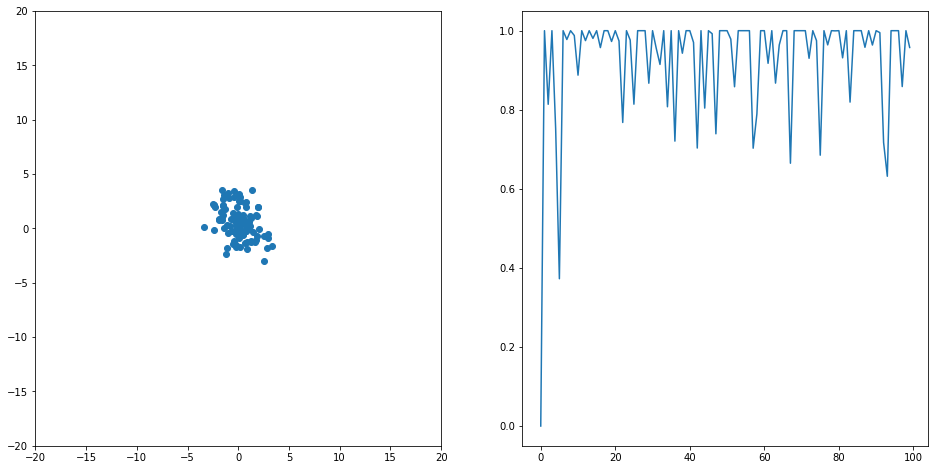

In [206]:
plt.rcParams["figure.figsize"]=16,8

plt.subplot(1,2,1)
plt.scatter(x1[:,0], x1[:,1])
plt.xlim(-20,20)
plt.ylim(-20,20)

plt.subplot(1,2,2)
plt.plot(rr)

plt.rcParams["figure.figsize"]=8,8

M_est = jnp.mean(x1, axis = 0)
print("Mean error =", jnp.linalg.norm(M - M_est))

C_est = jnp.cov(x1.transpose())
print("Covariance error =", jnp.linalg.norm(C - C_est)/jnp.linalg.norm(C))